<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/AAnalyse_Graphique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Run le file d'analyse principale pour pouvoir acceder au data et variables
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
!jupyter nbconvert --to python Project_NBA_GroupM/Analyse_Principale.ipynb
%run Project_NBA_GroupM/Analyse_Principale.py
!pip install svgpath2mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import io
import os
import xml.etree.ElementTree as ET
from svgpath2mpl import parse_path
import matplotlib.patches as patches

fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
[NbConvertApp] Converting notebook Project_NBA_GroupM/Analyse_Principale.ipynb to python
[NbConvertApp] Writing 12751 bytes to Project_NBA_GroupM/Analyse_Principale.py
fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
--- Starting the analysis of each seasons ---

 ANALYSIS of : rs2005
Dimensions : 586 lines, 32 variables (columns)
 ATTENTION : 748 NaN Values in total were found !
Infos of NaN per column :
Rk          1
Age         1
Team       60
Pos         1
G           1
GS          1
MP          1
FG          1
FGA         1
FG%         2
3P          1
3PA         1
3P%       108
2P          1
2PA         1
2P%         2
eFG%        2
FT          1
FTA         1
FT%        25
ORB         1
DRB         1
TRB         1
AST         1
STL         1
BLK         1
TOV         1
PF          1
PTS         1
Awards    526
dtype: int64
-------------------------

,Rk,Team,Overall,Home,Road,W,≤3,≥10,L,W%
0,1,PHO,62-20,31-10,31-10,62,7-2,36-8,20,0.756098
1,2,MIA,59-23,35-6,24-17,59,7-8,33-6,23,0.719512
2,3,SAS,59-23,38-3,21-20,59,9-7,40-5,23,0.719512
3,4,DAL,58-24,29-12,29-12,58,8-4,28-10,24,0.707317
4,5,DET,54-28,32-9,22-19,54,8-8,26-14,28,0.658537
5,6,OKC,52-30,26-15,26-15,52,7-5,25-15,30,0.634146
6,7,HOU,51-31,26-15,25-16,51,12-6,28-11,31,0.621951
7,8,SAC,50-32,30-11,20-21,50,10-7,20-15,32,0.609756
8,9,DEN,49-33,31-10,18-23,49,8-4,25-18,33,0.597561
9,10,CHI,47-35,27-14,20-21,47,7-5,15-15,35,0.573171


All seasons combined
(13313, 33)


,Rk,Team,Overall,Home,Road,W,≤3,≥10,L,W%,Season
580,11,CLE,48-34,26-15,22-19,48,9-5,24-16,34,0.585366,2024
581,12,IND,47-35,26-15,21-20,47,6-5,30-16,35,0.573171,2024
582,13,LAL,47-35,28-14,19-21,47,11-4,20-25,35,0.573171,2024
583,14,ORL,47-35,29-12,18-23,47,6-9,27-20,35,0.573171,2024
584,15,PHI,47-35,25-16,22-19,47,3-4,27-18,35,0.573171,2024
585,16,MIA,46-36,22-19,24-17,46,8-4,21-15,36,0.560976,2024
586,17,GSW,46-36,21-20,25-16,46,4-11,24-12,36,0.560976,2024
587,18,SAC,46-36,24-17,22-19,46,6-5,26-19,36,0.560976,2024
588,19,HOU,41-41,27-14,14-27,41,8-5,23-17,41,0.500000,2024
589,20,CHI,39-43,20-21,19-22,39,6-8,12-25,43,0.475610,2024


DataFrame after removing rows with missing or non-numerical values in specified columns:
(11236, 33)


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional,Season
0,1.0,Allen Iverson,29.0,PHI,PG,75.0,75.0,42.3,10.3,24.2,...,4.0,7.9,2.4,0.1,4.6,1.9,30.7,MVP-5DPOY-11ASNBA1,iversal01,2005
1,2.0,Kobe Bryant,26.0,LAL,SG,66.0,66.0,40.7,8.7,20.1,...,5.9,6.0,1.3,0.8,4.1,2.6,27.6,ASNBA3,bryanko01,2005
2,3.0,LeBron James,20.0,CLE,SF,80.0,80.0,42.4,9.9,21.1,...,7.4,7.2,2.2,0.7,3.3,1.8,27.2,MVP-6ASNBA2,jamesle01,2005
3,4.0,Dirk Nowitzki,26.0,DAL,PF,78.0,78.0,38.7,8.5,18.5,...,9.7,3.1,1.2,1.5,2.3,2.8,26.1,MVP-3ASNBA1,nowitdi01,2005
4,5.0,Amar'e Stoudemire,22.0,PHO,C,80.0,80.0,36.1,9.3,16.7,...,8.9,1.6,1.0,1.6,2.4,3.5,26.0,MVP-9ASNBA2,stoudam01,2005


Missing values per column in nbas_data_full:


,0
Team,1200
Awards,9992


Normalisation using'MP
Stats 'per 36 minutes' créées.
   Season    MP   PTS  PTS_per_36
0    2005  42.3  30.7   26.127660
1    2005  40.7  27.6   24.412776
2    2005  42.4  27.2   23.094340
3    2005  38.7  26.1   24.279070
4    2005  36.1  26.0   25.927978

Effeciency mean stats per team per season:


,Season,Team,PTS_per_36,AST_per_36,TRB_per_36,STL_per_36,BLK_per_36,TOV_per_36,PF_per_36
0,2005,ATL,12.756688,2.955113,5.840819,1.218494,0.510474,2.212654,4.031548
1,2005,BOS,14.342377,3.024734,5.979626,1.182212,0.714423,2.112897,3.927485
2,2005,BRK,12.439679,2.603393,5.364448,1.176340,0.389075,1.761814,3.601336
3,2005,CHI,13.667737,3.730349,5.935993,1.276501,0.480355,2.364781,3.601919
4,2005,CHO,13.784792,3.492592,5.089348,1.480915,0.433471,2.167896,3.964484



 Winners based on our model vs actual winners:
    Season Team  Final_Power_Score Team        W%
0     2005  SAC           3.653493  PHO  0.756098
1     2006  PHO           4.073767  DET  0.780488
2     2007  DET           3.572061  DAL  0.817073
3     2008  LAL           3.728492  BOS  0.804878
4     2009  DET           3.807596  CLE  0.804878
5     2010  SAS           3.605938  CLE  0.743902
6     2011  HOU           3.682355  CHI  0.756098
7     2012  GSW           3.738755  CHI  0.757576
8     2013  DEN           3.839442  MIA  0.804878
9     2014  LAL           3.749465  SAS  0.756098
10    2015  GSW           4.090989  GSW  0.817073
11    2016  GSW           3.992591  GSW  0.890244
12    2017  GSW           4.369661  GSW  0.817073
13    2018  GSW           4.404412  HOU  0.792683
14    2019  BOS           4.185800  MIL  0.731707
15    2020  MIL           4.072583  MIL  0.767123
16    2021  BRK           4.373371  UTA  0.722222
17    2022  MEM           4.331807  PHO  0.780488
18

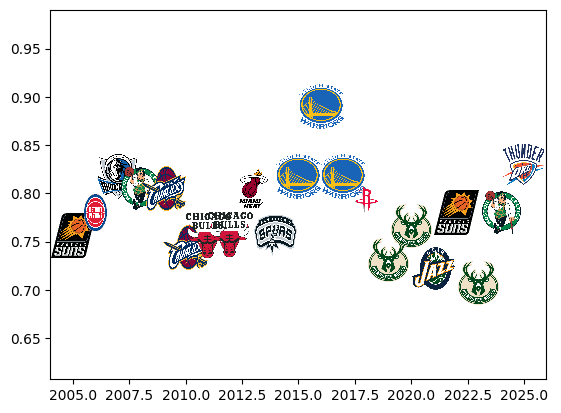

In [25]:
folder='Project_NBA_GroupM'
images = {}
for filename in os.listdir(folder):
    if filename.endswith(('.jpg', '.jpeg','png')):
        key = os.path.splitext(filename)[0]  # filename without extension
        images[key] = os.path.join(folder, filename)


fig, ax=plt.subplots()

ax.scatter(Comparaison['Season'],Comparaison['W%'],alpha=0)
for i, row in Comparaison.iterrows(): # Iterate over Comparaison DataFrame
    # Access the second 'Team' column which represents the actual winner
    img = Image.open(images[row.iloc[3]]).convert("RGBA")
    img = img.resize((1080,1080), resample=Image.LANCZOS)
    im = OffsetImage(img, zoom=0.03)
    ab = AnnotationBbox(im, (row['Season'], row['W%']), frameon=False)
    ax.add_artist(ab)
# Revert xlim and ylim to dynamic calculation
ax.set_xlim(Comparaison['Season'].min() - 1, Comparaison['Season'].max() + 1)
ax.set_ylim(Comparaison['W%'].min() - 0.1, Comparaison['W%'].max() + 0.1)
plt.show()